In [2]:
import numpy as np
import pandas as pd
import PIL

In [35]:
yolo_result=pd.read_csv(r'D:\yolo_result.csv',encoding='utf-8')
display(yolo_result)

,index,label,left,top,right,bottom,filepath
0,0,Top 0.92,230,183,458,405,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
1,1,Bottom 0.98,242,385,497,595,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
2,0,Top 0.99,233,187,476,379,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
3,1,Bottom 0.99,232,361,507,636,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
4,0,Top 0.42,295,219,377,391,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
...,...,...,...,...,...,...,...
4379,1,Bottom 0.64,232,347,450,886,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
4380,0,Top 0.66,242,166,452,382,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
4381,1,Bottom 0.84,233,336,440,680,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...
4382,0,Top 0.62,229,151,496,299,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...


In [36]:
yolo_result['image_name']=yolo_result['filepath'].apply(lambda x: x.split('/')[-1])

In [37]:
yolo_result['label']=yolo_result['label'].apply(lambda x: x.split(' ')[-2])

In [41]:
display(yolo_result)

,index,label,left,top,right,bottom,filepath,image_name
0,0,Top,230,183,458,405,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_21302_1_500.jpg
1,1,Bottom,242,385,497,595,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_21302_1_500.jpg
2,0,Top,233,187,476,379,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_21301_1_500.jpg
3,1,Bottom,232,361,507,636,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_21301_1_500.jpg
4,0,Top,295,219,377,391,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_21299_1_500.jpg
...,...,...,...,...,...,...,...,...
4379,1,Bottom,232,347,450,886,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_16583_1_500.jpg
4380,0,Top,242,166,452,382,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_16545_1_500.jpg
4381,1,Bottom,233,336,440,680,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_16545_1_500.jpg
4382,0,Top,229,151,496,299,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,detail_16537_1_500.jpg


### Bounding Box 확인

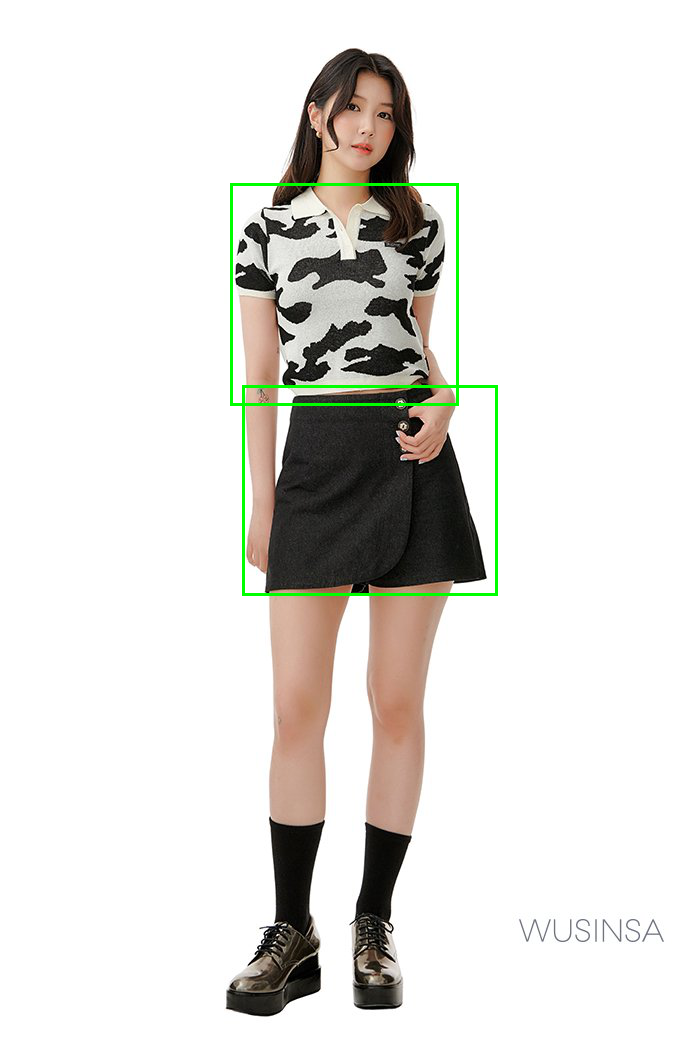

In [22]:
from PIL import Image, ImageDraw

box_color_RGBA  = (0,255,0,255)
load_path = r'D:\musinsa test image'
image1 = Image.open(load_path + '\\detail_21302_1_500.jpg')

draw = ImageDraw.Draw(image1)
draw.rectangle((230,183,458,405),outline=box_color_RGBA, width = 3)
draw.rectangle((242,385,497,595),outline=box_color_RGBA, width = 3)
display(image1)

#crop_img.save('/content/gdrive/MyDrive/Colab Notebooks/test.jpg')

### Cropping image

In [49]:
import os
from PIL import Image

for index in range(yolo_result.shape[0]):
    image_path=os.path.join('D:\\musinsa test image',yolo_result['image_name'][index])
    image = Image.open(image_path)
    crop_img = image.crop((yolo_result['left'][index],yolo_result['top'][index],yolo_result['right'][index],yolo_result['bottom'][index]))
    if yolo_result['label'][index] == 'Top':
        save_name=yolo_result['image_name'][index][:-4]+'_2.jpg'
        save_path=os.path.join('D:\\musinsa_top',save_name)
        crop_img.save(save_path)
        
    elif yolo_result['label'][index] == 'Bottom':
        save_name=yolo_result['image_name'][index][:-4]+'_1.jpg'
        save_path=os.path.join('D:\\musinsa_bottom',save_name)
        crop_img.save(save_path)